In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import style
style.use('bmh')
#Not to show warning messages (to keep the notebook clean)
import warnings
warnings.filterwarnings('ignore')

## Electric circuit exemples (Chapter 7)

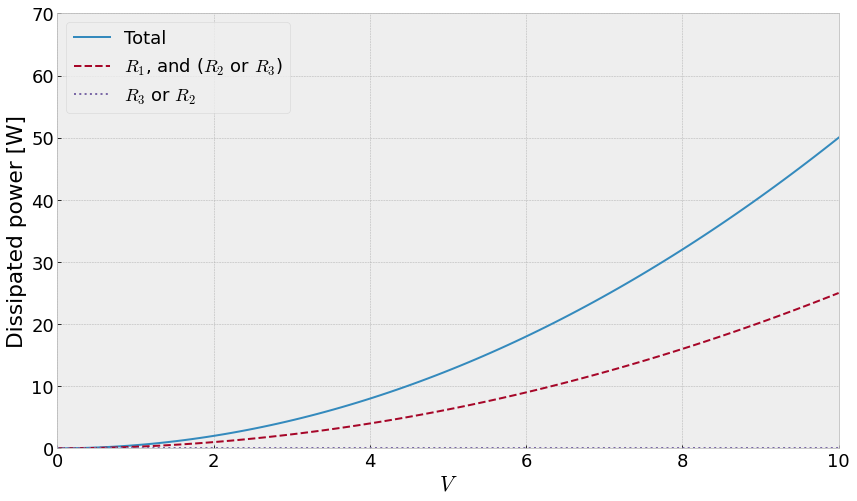

In [ ]:
#Case 2############
plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 18})
R = 1 # resistence
#
v = np.linspace(0, 10, 100) 
power = v**2/(2*R)
power2 = v**2/(4*R)
power3=np.zeros(100)

#
plt.plot(v, power,'-',label='Total')
plt.plot(v, power2,'--',label='$R_1$, and ($R_2$ or $R_3$)')
plt.plot(v, power3,':',label='$R_3$ or $R_2$')
#
num_G = np.linspace(0, 3 , 100) 
plt.ylim([0, 70])
plt.xlim([0, 10])
plt.xlabel("$V$")
plt.ylabel("Dissipated power [W]")
plt.legend( loc ="upper left")
plt.savefig('case2.pdf',pad_inches=0) 
plt.show()

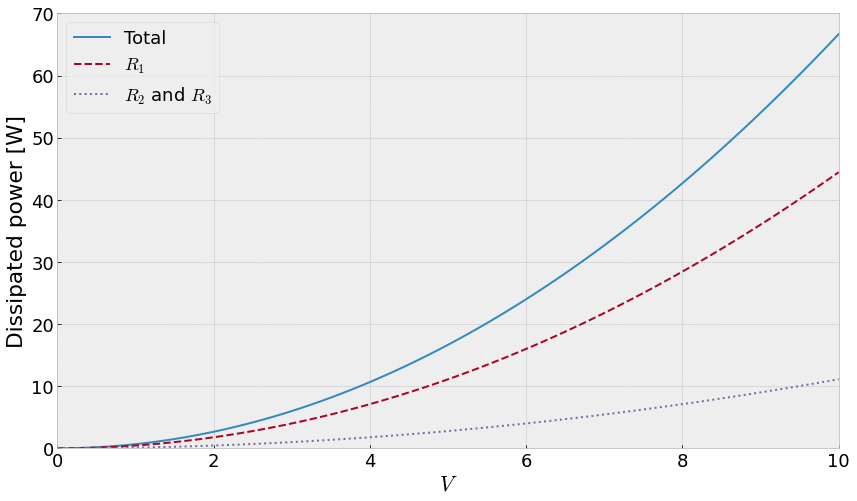

In [ ]:
#Case 3############
plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 18})
R =1 # resistence
#
v = np.linspace(0, 10, 100) 
power = 2*v**2/(3*R)
power2 = 4*v**2/(9*R)
power3 = 1*v**2/(9*R)

#
plt.plot(v, power,'-',label='Total')
plt.plot(v, power2,'--',label='$R_1$')
plt.plot(v, power3,':',label='$R_2$ and $R_3$')
#
num_G = np.linspace(0, 3 , 100) 
plt.ylim([0, 70])
plt.xlim([0, 10])
plt.xlabel("$V$")
plt.ylabel("Dissipated power [W]")
plt.legend( loc ="upper left")
plt.savefig('case3.pdf',pad_inches=0) 
plt.show()

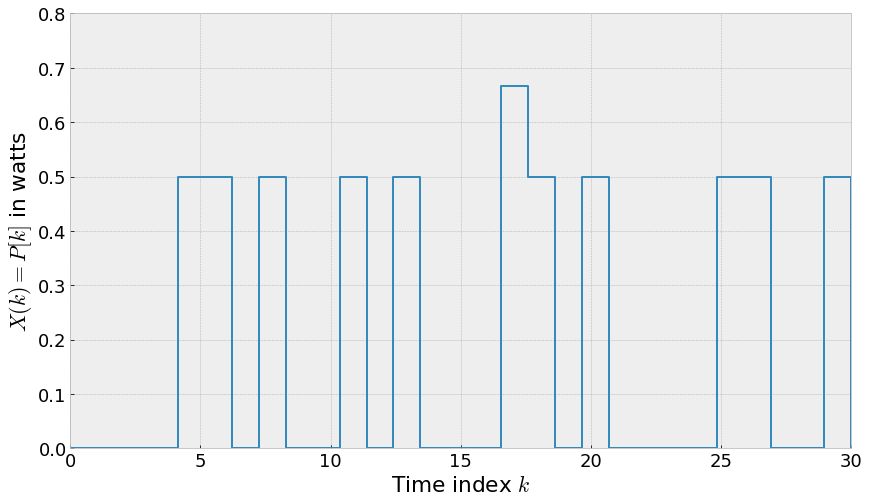

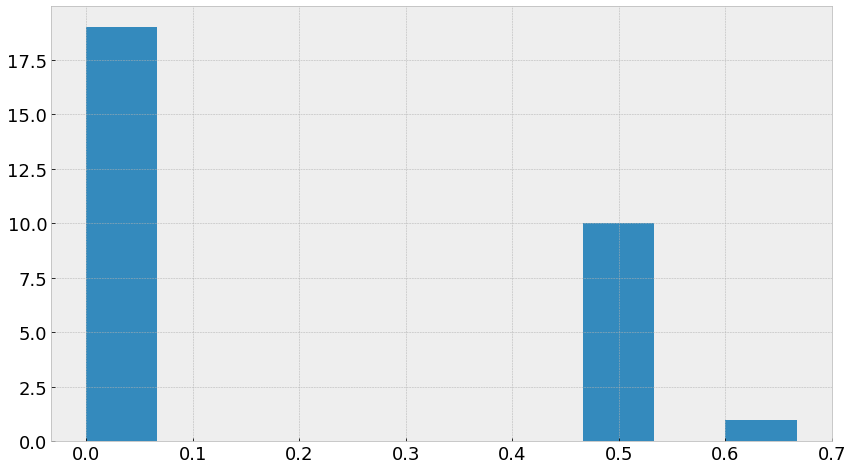

In [ ]:
#Case sum############
#Switches are on or off with 50% chance.
num_obs=30


R = 1 # resistence
v= 1 # input voltage
#
t = np.linspace(0, num_obs, num_obs)
input2 = np.random.randint(2, size=num_obs)
input3 = np.random.randint(2, size=num_obs) 
input4 = np.random.randint(2, size=num_obs)  

#Power all on
power2 = 4*v**2/(9*R) * input2
power3 = 1*v**2/(9*R) * input3  #R2
power4 = 1*v**2/(9*R) * input4  #R3

for i in range(0, num_obs):
    if (input3[i] == 0) & (input4[i] == 0): 
        power2[i] = 0
        power3[i] = 0
        power4[i] = 0
    if input2[i] == 0: 
        power2[i] = 0
        power3[i] = 0
        power4[i] = 0
    else:
        if (input3[i] == 0) & (input4[i] != 0): 
            power2[i] = v**2/(4*R)
            power3[i] = v**2/(4*R)
            power4[i] = 0
        if (input3[i] !=0) & (input4[i] == 0): 
            power2[i] = v**2/(4*R)
            power3[i] = 0
            power4[i] = v**2/(4*R)

power_total = power2 + power3 + power4

plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 18})
plt.ylim([0, 0.8])
plt.xlim([0, num_obs])
#plt.step(t,power2,':',where='post', label='$R_1$')
#plt.step(t, power3,'--'  ,where='post',label='$R_2$')
#plt.step(t, power4, '-.',where='post',label='$R_3$')
plt.step(t, power_total,'-' ,where='post',label='Total')
plt.xlabel("Time index $k$")
plt.ylabel("$X(k) = P[k]$ in watts")
#plt.legend( loc ="upper left")
plt.savefig('totalpower.pdf',pad_inches=0) 
plt.show()

plt.figure(figsize=(14,8))
plt.rcParams.update({'font.size': 18})
plt.hist(power_total)
plt.show()

## Self-developing system example

0.0


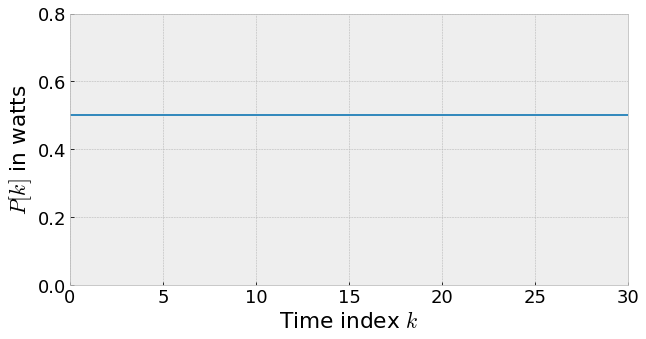

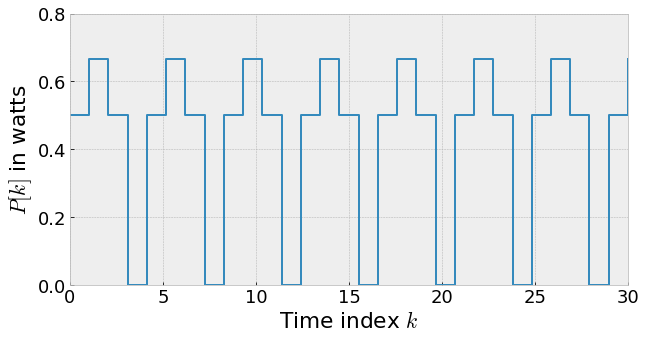

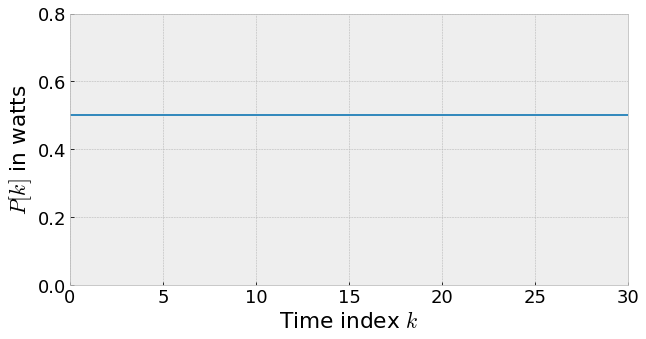

In [ ]:
num_obs=30

R = 1 # resistence
#v = np.random.rand(num_obs) * 3 # input voltage
v = np.ones(num_obs)

#
t = np.linspace(0, num_obs, num_obs)
power1 = np.zeros(num_obs)
power2 = np.zeros(num_obs)
power3 = np.zeros(num_obs)
power_total = power1 + power2 + power3

state1 = np.ones(num_obs)
state2 = np.ones(num_obs)
state3 = np.zeros(num_obs) 
#state3 = np.ones(num_obs)




print(power_total[0])


for i in range(1, num_obs):
    if state2[i-1] == 1:
        state3[i] = 1
    else:
        state3[i] = 0
    if state3[i-1] == 1:
        state2[i] = 0
    else:
        state2[i] = 1

for i in range(0, num_obs):
    if (state2[i] == 1) & (state3[i] == 1):
        power1[i] = 4*v[i]**2/(9*R)
        power2[i] = 1*v[i]**2/(9*R)
        power3[i] = 1*v[i]**2/(9*R) 
    if (state2[i] == 1) & (state3[i] == 0):
        power1[i] = v[i]**2/(4*R)
        power2[i] = v[i]**2/(4*R)
        power3[i] = 0
    if (state2[i] == 0) & (state3[i] == 1):
        power1[i] = v[i]**2/(4*R)
        power2[i] = 0
        power3[i] = v[i]**2/(4*R)
    if (state2[i] == 0) & (state3[i] == 0):
        power1[i] = 0
        power2[i] = 0
        power3[i] = 0

power_total_invert_1= power1 + power2 + power3

for i in range(1, num_obs):
    if state2[i-1] == 1:
        state3[i] = 0
    else:
        state3[i] = 1
    if state3[i-1] == 1:
        state2[i] = 0
    else:
        state2[i] = 1

for i in range(0, num_obs):
    if (state2[i] == 1) & (state3[i] == 1):
        power1[i] = 4*v[i]**2/(9*R)
        power2[i] = 1*v[i]**2/(9*R)
        power3[i] = 1*v[i]**2/(9*R) 
    if (state2[i] == 1) & (state3[i] == 0):
        power1[i] = v[i]**2/(4*R)
        power2[i] = v[i]**2/(4*R)
        power3[i] = 0
    if (state2[i] == 0) & (state3[i] == 1):
        power1[i] = v[i]**2/(4*R)
        power2[i] = 0
        power3[i] = v[i]**2/(4*R)
    if (state2[i] == 0) & (state3[i] == 0):
        power1[i] = 0
        power2[i] = 0
        power3[i] = 0

power_total_invert_2= power1 + power2 + power3

for i in range(1, num_obs):
    if state2[i-1] == 1:
        state3[i] = 1
    else:
        state3[i] = 0
    if state3[i-1] == 1:
        state2[i] = 1
    else:
        state2[i] = 0

for i in range(0, num_obs):
    if (state2[i] == 1) & (state3[i] == 1):
        power1[i] = 4*v[i]**2/(9*R)
        power2[i] = 1*v[i]**2/(9*R)
        power3[i] = 1*v[i]**2/(9*R) 
    if (state2[i] == 1) & (state3[i] == 0):
        power1[i] = v[i]**2/(4*R)
        power2[i] = v[i]**2/(4*R)
        power3[i] = 0
    if (state2[i] == 0) & (state3[i] == 1):
        power1[i] = v[i]**2/(4*R)
        power2[i] = 0
        power3[i] = v[i]**2/(4*R)
    if (state2[i] == 0) & (state3[i] == 0):
        power1[i] = 0
        power2[i] = 0
        power3[i] = 0

power_total_same= power1 + power2 + power3


plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 18})
plt.ylim([0, 0.8])
plt.xlim([0, num_obs])
plt.step(t, power_total_same,'-' ,where='post')
plt.xlabel("Time index $k$")
plt.ylabel("$P[k]$ in watts")
#plt.legend( loc ="upper left")
plt.savefig('totalpower_2a.pdf',pad_inches=0) 
plt.show()


plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 18})
plt.ylim([0, 0.8])
plt.xlim([0, num_obs])
plt.step(t, power_total_invert_1,'-' ,where='post')
plt.xlabel("Time index $k$")
plt.ylabel("$P[k]$ in watts")
#plt.legend( loc ="upper left")
plt.savefig('totalpower_2b.pdf',pad_inches=0) 
plt.show()


plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 18})
plt.ylim([0, 0.8])
plt.xlim([0, num_obs])
plt.step(t, power_total_invert_2,'-' ,where='post')
plt.xlabel("Time index $k$")
plt.ylabel("$P[k]$ in watts")
#plt.legend( loc ="upper left")
plt.savefig('totalpower_2c.pdf',pad_inches=0) 
plt.show()

0.0


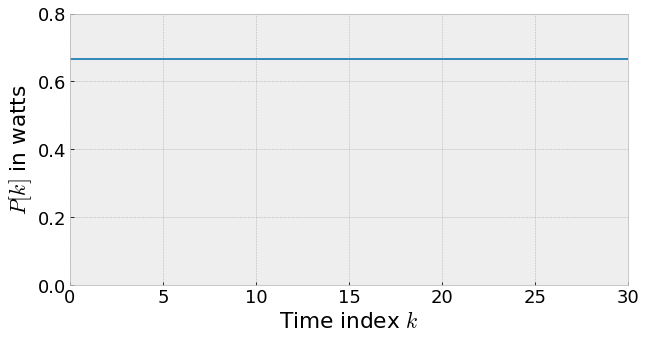

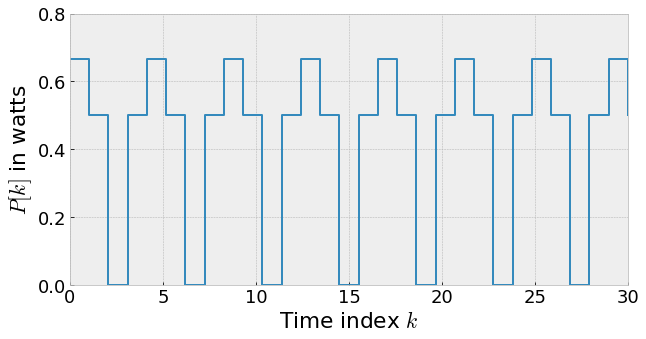

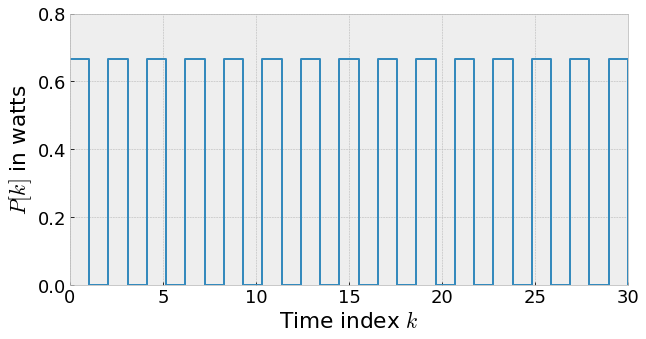

In [ ]:
um_obs=30

R = 1 # resistence
#v = np.random.rand(num_obs) * 3 # input voltage
v = np.ones(num_obs)

#
t = np.linspace(0, num_obs, num_obs)
power1 = np.zeros(num_obs)
power2 = np.zeros(num_obs)
power3 = np.zeros(num_obs)
power_total = power1 + power2 + power3

state1 = np.ones(num_obs)
state2 = np.ones(num_obs)
#state3 = np.zeros(num_obs) 
state3 = np.ones(num_obs)



print(power_total[0])


for i in range(1, num_obs):
    if state2[i-1] == 1:
        state3[i] = 1
    else:
        state3[i] = 0
    if state3[i-1] == 1:
        state2[i] = 0
    else:
        state2[i] = 1

for i in range(0, num_obs):
    if (state2[i] == 1) & (state3[i] == 1):
        power1[i] = 4*v[i]**2/(9*R)
        power2[i] = 1*v[i]**2/(9*R)
        power3[i] = 1*v[i]**2/(9*R) 
    if (state2[i] == 1) & (state3[i] == 0):
        power1[i] = v[i]**2/(4*R)
        power2[i] = v[i]**2/(4*R)
        power3[i] = 0
    if (state2[i] == 0) & (state3[i] == 1):
        power1[i] = v[i]**2/(4*R)
        power2[i] = 0
        power3[i] = v[i]**2/(4*R)
    if (state2[i] == 0) & (state3[i] == 0):
        power1[i] = 0
        power2[i] = 0
        power3[i] = 0

power_total_invert_1= power1 + power2 + power3

for i in range(1, num_obs):
    if state2[i-1] == 1:
        state3[i] = 0
    else:
        state3[i] = 1
    if state3[i-1] == 1:
        state2[i] = 0
    else:
        state2[i] = 1

for i in range(0, num_obs):
    if (state2[i] == 1) & (state3[i] == 1):
        power1[i] = 4*v[i]**2/(9*R)
        power2[i] = 1*v[i]**2/(9*R)
        power3[i] = 1*v[i]**2/(9*R) 
    if (state2[i] == 1) & (state3[i] == 0):
        power1[i] = v[i]**2/(4*R)
        power2[i] = v[i]**2/(4*R)
        power3[i] = 0
    if (state2[i] == 0) & (state3[i] == 1):
        power1[i] = v[i]**2/(4*R)
        power2[i] = 0
        power3[i] = v[i]**2/(4*R)
    if (state2[i] == 0) & (state3[i] == 0):
        power1[i] = 0
        power2[i] = 0
        power3[i] = 0

power_total_invert_2= power1 + power2 + power3

for i in range(1, num_obs):
    if state2[i-1] == 1:
        state3[i] = 1
    else:
        state3[i] = 0
    if state3[i-1] == 1:
        state2[i] = 1
    else:
        state2[i] = 0

for i in range(0, num_obs):
    if (state2[i] == 1) & (state3[i] == 1):
        power1[i] = 4*v[i]**2/(9*R)
        power2[i] = 1*v[i]**2/(9*R)
        power3[i] = 1*v[i]**2/(9*R) 
    if (state2[i] == 1) & (state3[i] == 0):
        power1[i] = v[i]**2/(4*R)
        power2[i] = v[i]**2/(4*R)
        power3[i] = 0
    if (state2[i] == 0) & (state3[i] == 1):
        power1[i] = v[i]**2/(4*R)
        power2[i] = 0
        power3[i] = v[i]**2/(4*R)
    if (state2[i] == 0) & (state3[i] == 0):
        power1[i] = 0
        power2[i] = 0
        power3[i] = 0

power_total_same= power1 + power2 + power3

plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 18})
plt.ylim([0, 0.8])
plt.xlim([0, num_obs])
plt.step(t, power_total_same,'-' ,where='post')
plt.xlabel("Time index $k$")
plt.ylabel("$P[k]$ in watts")
#plt.legend( loc ="upper left")
plt.savefig('totalpower_1a.pdf',pad_inches=0) 
plt.show()


plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 18})
plt.ylim([0, 0.8])
plt.xlim([0, num_obs])
plt.step(t, power_total_invert_1,'-' ,where='post')
plt.xlabel("Time index $k$")
plt.ylabel("$P[k]$ in watts")
#plt.legend( loc ="upper left")
plt.savefig('totalpower_1b.pdf',pad_inches=0) 
plt.show()


plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 18})
plt.ylim([0, 0.8])
plt.xlim([0, num_obs])
plt.step(t, power_total_invert_2,'-' ,where='post')
plt.xlabel("Time index $k$")
plt.ylabel("$P[k]$ in watts")
#plt.legend( loc ="upper left")
plt.savefig('totalpower_1c.pdf',pad_inches=0) 
plt.show()

0.0


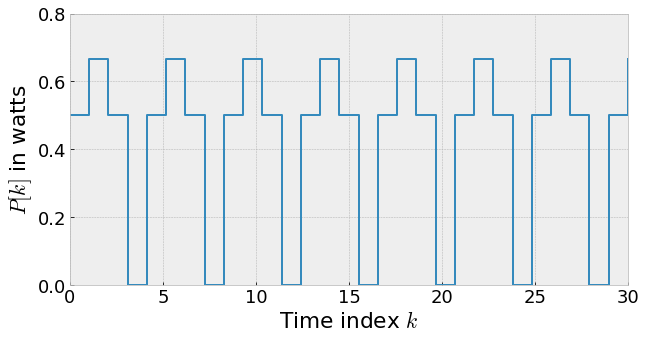

In [ ]:
num_obs=30

R = 1 # resistence
#v = np.random.rand(num_obs) * 3 # input voltage
v = np.ones(num_obs)

#
t = np.linspace(0, num_obs, num_obs)
power1 = np.zeros(num_obs)
power2 = np.zeros(num_obs)
power3 = np.zeros(num_obs)
power_total = power1 + power2 + power3

state1 = np.ones(num_obs)
state2 = np.ones(num_obs)
state3 = np.zeros(num_obs) 
#state3 = np.ones(num_obs)




print(power_total[0])


for i in range(1, num_obs):
    if state2[i-1] == 1:
        state3[i] = 1
    else:
        state3[i] = 0
    if state3[i-1] == 1:
        state2[i] = 0
    else:
        state2[i] = 1

for i in range(0, num_obs):
    if (state2[i] == 1) & (state3[i] == 1):
        power1[i] = 4*v[i]**2/(9*R)
        power2[i] = 1*v[i]**2/(9*R)
        power3[i] = 1*v[i]**2/(9*R) 
    if (state2[i] == 1) & (state3[i] == 0):
        power1[i] = v[i]**2/(4*R)
        power2[i] = v[i]**2/(4*R)
        power3[i] = 0
    if (state2[i] == 0) & (state3[i] == 1):
        power1[i] = v[i]**2/(4*R)
        power2[i] = 0
        power3[i] = v[i]**2/(4*R)
    if (state2[i] == 0) & (state3[i] == 0):
        power1[i] = 0
        power2[i] = 0
        power3[i] = 0

power_total_random= power1 + power2 + power3

plt.figure(figsize=(10,5))
plt.rcParams.update({'font.size': 18})
plt.ylim([0, 0.8])
plt.xlim([0, num_obs])
plt.step(t, power_total_random,'-' ,where='post')
plt.xlabel("Time index $k$")
plt.ylabel("$P[k]$ in watts")
#plt.legend( loc ="upper left")
plt.savefig('totalpower_2a.pdf',pad_inches=0) 
plt.show()


In [ ]:
power_total

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Game theory solution

In [ ]:
! pip install nashpy

    ERROR: Command errored out with exit status 1:
     command: /root/venv/bin/python -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-zhwok393/nashpy_45f7c9abe06e48e38ce919c1fa32af42/setup.py'"'"'; __file__='"'"'/tmp/pip-install-zhwok393/nashpy_45f7c9abe06e48e38ce919c1fa32af42/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base /tmp/pip-pip-egg-info-cgqmzcay
         cwd: /tmp/pip-install-zhwok393/nashpy_45f7c9abe06e48e38ce919c1fa32af42/
    Complete output (5 lines):
    Traceback (most recent call last):
      File "<string>", line 1, in <module>
      File "/tmp/pip-install-zhwok393/nashpy_45f7c9abe06e48e38ce919c1fa32af42/setup.py", line 6, in <module>
        with open("requirements.txt") as f:
    FileNotFound

In [ ]:
import nashpy as nash

In [ ]:
v=1
A = [[0, 0], [v**2/4, v**2/9]]
B = [[0, v**2/4], [0, v**2/9]]
circ_gt = nash.Game(A, B)
circ_gt

Bi matrix game with payoff matrices:

Row player:
[[0.         0.        ]
 [0.25       0.11111111]]

Column player:
[[0.         0.25      ]
 [0.         0.11111111]]

In [ ]:
eqs = circ_gt.support_enumeration()
list(eqs)

[(array([0., 1.]), array([0., 1.]))]

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ea736d9a-8501-4429-86ea-0521db259491' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>